In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

import numpy as np
import os
import PIL
import PIL.Image
import glob

import cv2

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [7]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [3]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

count = 0

path = "chest_xray/train/NORMAL"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    if (count % 10 == 0):
        x_val.append(img)
        y_val.append(int(0))
    else:
        x_train.append(img)
        y_train.append(int(0))
    count = count + 1

count = 0

path = "chest_xray/train/PNEUMONIA"
for image_name in os.listdir(path):

    img = cv2.imread(os.path.join(path,image_name))
    if (count % 10 == 0):
        x_val.append(img)
        y_val.append(int(1))
    else:
        x_train.append(img)
        y_train.append(int(1))
    count = count + 1



path = "chest_xray/val/NORMAL"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    x_val.append(img)
    y_val.append(int(0))

path = "chest_xray/val/PNEUMONIA"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    x_val.append(img)
    y_val.append(int(1))


path = "chest_xray/test/NORMAL"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    x_test.append(img)
    y_test.append(int(0))

path = "chest_xray/test/PNEUMONIA"
for image_name in os.listdir(path):
    img = cv2.imread(os.path.join(path,image_name))
    x_test.append(img)
    y_test.append(int(1))

In [4]:
len(x_test)


624

In [6]:
# Resize all the images to 128 x 128 and set to Greyscale

endTrain = len(x_train)
endVal = len(x_val)
endTest = len(x_test)

for image in range(0,endTrain):
    x_train[image] = tf.image.resize_with_pad(x_train[image],128,128)
    x_train[image] = tf.image.rgb_to_grayscale(x_train[image])

for image in range(0,endVal):
    x_val[image] = tf.image.resize_with_pad(x_val[image],128,128)
    x_val[image] = tf.image.rgb_to_grayscale(x_val[image])

for image in range(0,endTest):
    x_test[image] = tf.image.resize_with_pad(x_test[image],128,128)
    x_test[image] = tf.image.rgb_to_grayscale(x_test[image])

2022-09-22 12:59:54.126641: E tensorflow/stream_executor/cuda/cuda_blas.cc:232] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2022-09-22 12:59:54.126662: E tensorflow/stream_executor/cuda/cuda_blas.cc:234] Failure to initialize cublas may be due to OOM (cublas needs some free memory when you initialize it, and your deep-learning framework may have preallocated more than its fair share), or may be because this binary was not built with support for the GPU in your machine.
2022-09-22 12:59:54.126670: W tensorflow/stream_executor/stream.cc:1260] attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError: Blas xGEMV launch failed : a.shape=[1,16384,3], b.shape=[1,3,1], m=16384, n=1, k=3 [Op:MatMul]

(4693, 128, 128, 1)
(539, 128, 128, 1)


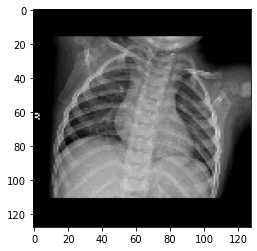

In [69]:
#  Convert to numpy array and check image.  Image data is type integer.(0,255)  Label data is type float. (0,1)

x_train = np.asarray(x_train, dtype=int)
y_train = np.asarray(y_train, dtype=float)
x_val = np.asarray(x_val, dtype=int)
y_val = np.asarray(y_val, dtype=float)
x_test = np.asarray(x_test, dtype=int)
y_test = np.asarray(y_test, dtype=float)

print(x_train.shape)
print(x_val.shape)

plt.imshow(x_train[0], cmap='gray')

In [70]:
# Normalize Image Data
x_train = x_train.astype("float32") /255
x_val = x_val.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# y_train = np.asarray(y_train).astype('float32').reshape((-1,1))

# y_val= np.asarray(y_val).astype('float32').reshape((-1,1))

In [71]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(4693, 128, 128, 1)
(4693,)
(539, 128, 128, 1)
(539,)
(624, 128, 128, 1)
(624,)


In [10]:
# end = len(x_train)

# x_dataAug = []
# y_dataAug = []
# for image in range(0,end):
#     x_dataAug.append(multiply(x_train[image]))
#     y_dataAug.append(y_train[image])
#     x_dataAug.append(screen(x_train[image]))
#     y_dataAug.append(y_train[image])

In [11]:
# Save the processed x_train files

# end = len(x_train)
# path = 'chest_xray/processed'
# saveImages = np.asarray(x_train)
# # saveImages = saveImages * 255
# saveImages = saveImages.astype("int64")
# for image in range(0,end):
#     cv2.imwrite(os.path.join(path, str(image) + '.jpg'),saveImages[image])

In [12]:
# pretrained_base = tf.keras.applications.vgg19.VGG19(
#     include_top=False, weights='imagenet', input_tensor=None,
#     input_shape=[224,224,3], pooling=None, classes=None,
#     classifier_activation=None
# )

In [56]:
model = tf.keras.Sequential([
   # Model Creation 
 
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same', input_shape=[128, 128, 1]),

    layers.BatchNormalization(),
    

    #Second Convolution Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Third Convolution Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Fourth Convolution Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Fifth Convolution Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Sixth Convolution Block
    layers.Conv2D(filters=2048, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Classifer Head
    layers.Flatten(),
    layers.Dropout(.4),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=256, activation="relu"),
    layers.Dropout(0.3),
     layers.Dense(units=128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=1, activation="sigmoid"),
])

In [72]:
opt = tf.optimizers.Adam(learning_rate=0.0001)

In [31]:
model.compile(
    optimizer=opt,
    loss='BinaryCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,y_train,
    epochs=40,
    shuffle=True,
    validation_data=(x_val,y_val),
    verbose=1,
)

Epoch 1/40
147/147 [==============================] - 13s 84ms/step - loss: 1.5008 - accuracy: 0.8879 - val_loss: 14.8276 - val_accuracy: 0.7347
Epoch 2/40
147/147 [==============================] - 12s 83ms/step - loss: 0.8415 - accuracy: 0.9303 - val_loss: 8.6583 - val_accuracy: 0.7347
Epoch 3/40
147/147 [==============================] - 12s 83ms/step - loss: 0.6483 - accuracy: 0.9476 - val_loss: 1.8690 - val_accuracy: 0.7848
Epoch 4/40
147/147 [==============================] - 12s 83ms/step - loss: 0.5438 - accuracy: 0.9508 - val_loss: 0.4231 - val_accuracy: 0.9610
Epoch 5/40
147/147 [==============================] - 12s 84ms/step - loss: 0.5320 - accuracy: 0.9561 - val_loss: 0.5626 - val_accuracy: 0.9388
Epoch 6/40
147/147 [==============================] - 12s 84ms/step - loss: 0.4136 - accuracy: 0.9629 - val_loss: 0.3246 - val_accuracy: 0.9629
Epoch 7/40
147/147 [==============================] - 12s 84ms/step - loss: 0.3487 - accuracy: 0.9665 - val_loss: 0.2339 - val_accuracy

In [32]:
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

20/20 [==============================] - 1s 54ms/step - loss: 5.7033 - accuracy: 0.8125
test loss, test acc: [5.703252792358398, 0.8125]


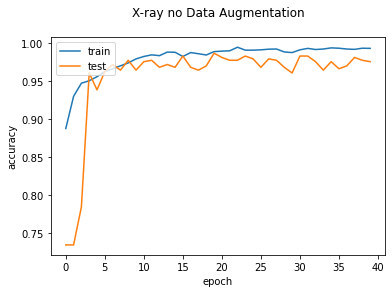

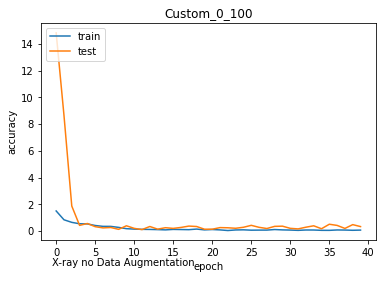

In [41]:
caption = 'X-ray no Data Augmentation' '\n'  

# Train/Val Accuracy Plot
# Test accuracy: 81.25%

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(caption)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Train/Test Loss Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custom_0_100')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(-.5,-3.5, caption)
plt.show()

In [73]:
# Multiply Function

def multiply(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Check if image is normalized between 0 - 1.
    if (max(img[0][0]) > 1):
        # Convert to float & normalize
        img = img.astype("float64") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = img[y,x,z] * img[y,x,z]
    
    # return Multiply image
    return img

# Screen Function

def screen(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Check if image is normalized between 0 - 1.
    if (max(img[0][0]) > 1):
        # Convert to float & normalize
        img = img.astype("float64") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])
    
    # return Multiply image
    return img


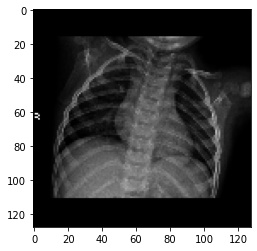

In [74]:
test = multiply(x_train[0])
plt.imshow(test, cmap='gray')

In [75]:
end = len(x_train)

x_dataAug = []
y_dataAug = []
for image in range(0,end):
    x_dataAug.append(multiply(x_train[image]))
    y_dataAug.append(y_train[image])
    x_dataAug.append(screen(x_train[image]))
    y_dataAug.append(y_train[image])

In [46]:
# y_dataAug = np.asarray(y_dataAug).astype('float32').reshape((-1,1))
y_dataAug = np.asarray(y_dataAug)
x_dataAug = np.asarray(x_dataAug)

In [47]:
print(y_dataAug.shape)
print(x_dataAug.shape)

(9386,)
(9386, 128, 128, 1)


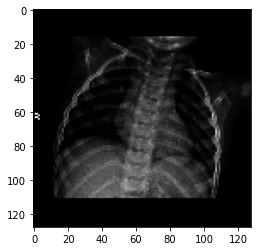

In [48]:
plt.imshow(x_dataAug[0], cmap='gray')

In [50]:
x_fullData = np.concatenate((x_train,x_dataAug))
y_fullData = np.concatenate((y_train,y_dataAug))


In [54]:
print(x_fullData.shape)

(14079, 128, 128, 1)


In [58]:
model.compile(
    optimizer=opt,
    loss='BinaryCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_fullData,y_fullData,
    epochs=40,
    shuffle=True,
    validation_data=(x_val,y_val),
    verbose=1,
)

Epoch 1/40
440/440 [==============================] - 37s 82ms/step - loss: 0.8950 - accuracy: 0.9215 - val_loss: 12.6251 - val_accuracy: 0.7347
Epoch 2/40
440/440 [==============================] - 37s 84ms/step - loss: 0.3992 - accuracy: 0.9577 - val_loss: 1.6258 - val_accuracy: 0.8942
Epoch 3/40
440/440 [==============================] - 37s 83ms/step - loss: 0.2175 - accuracy: 0.9744 - val_loss: 0.3652 - val_accuracy: 0.9647
Epoch 4/40
440/440 [==============================] - 36s 82ms/step - loss: 0.1253 - accuracy: 0.9802 - val_loss: 0.4343 - val_accuracy: 0.9518
Epoch 5/40
440/440 [==============================] - 36s 82ms/step - loss: 0.0814 - accuracy: 0.9879 - val_loss: 0.7360 - val_accuracy: 0.9518
Epoch 6/40
440/440 [==============================] - 36s 83ms/step - loss: 0.0992 - accuracy: 0.9862 - val_loss: 0.2728 - val_accuracy: 0.9722
Epoch 7/40
440/440 [==============================] - 37s 84ms/step - loss: 0.1379 - accuracy: 0.9830 - val_loss: 1.2524 - val_accuracy

In [59]:
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

20/20 [==============================] - 0s 20ms/step - loss: 12.9127 - accuracy: 0.7276
test loss, test acc: [12.912675857543945, 0.7275640964508057]


In [60]:
model = tf.keras.Sequential([
   # Model Creation 
 
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same', input_shape=[128, 128, 1]),

    layers.BatchNormalization(),
    

    #Second Convolution Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Third Convolution Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Fourth Convolution Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Fifth Convolution Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    

    #Sixth Convolution Block
    layers.Conv2D(filters=2048, kernel_size=3, activation="relu", padding='same'),

    layers.MaxPool2D(pool_size=(2, 2),),
    layers.BatchNormalization(),
    

    #Classifer Head
    layers.Flatten(),
    layers.Dropout(.4),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=256, activation="relu"),
    layers.Dropout(0.3),
     layers.Dense(units=128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(units=1, activation="sigmoid"),
])

In [62]:
model.compile(
    optimizer=opt,
    loss='BinaryCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_dataAug,y_dataAug,
    epochs=40,
    shuffle=True,
    validation_data=(x_val,y_val),
    verbose=1,
)

Epoch 1/40
294/294 [==============================] - 26s 87ms/step - loss: 3.7916 - accuracy: 0.9089 - val_loss: 32.6561 - val_accuracy: 0.7347
Epoch 2/40
294/294 [==============================] - 24s 82ms/step - loss: 0.9885 - accuracy: 0.9462 - val_loss: 3.5848 - val_accuracy: 0.8701
Epoch 3/40
294/294 [==============================] - 24s 82ms/step - loss: 0.4864 - accuracy: 0.9620 - val_loss: 3.9183 - val_accuracy: 0.8627
Epoch 4/40
294/294 [==============================] - 24s 83ms/step - loss: 0.2541 - accuracy: 0.9696 - val_loss: 4.3932 - val_accuracy: 0.8219
Epoch 5/40
294/294 [==============================] - 24s 82ms/step - loss: 0.2086 - accuracy: 0.9722 - val_loss: 0.6069 - val_accuracy: 0.9610
Epoch 6/40
294/294 [==============================] - 24s 82ms/step - loss: 0.1705 - accuracy: 0.9743 - val_loss: 1.5254 - val_accuracy: 0.9184
Epoch 7/40
294/294 [==============================] - 24s 83ms/step - loss: 0.1033 - accuracy: 0.9783 - val_loss: 0.6431 - val_accuracy

In [63]:
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

20/20 [==============================] - 0s 20ms/step - loss: 11.3048 - accuracy: 0.6715
test loss, test acc: [11.304786682128906, 0.6714743375778198]


In [64]:
model.compile(
    optimizer=opt,
    loss='BinaryCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,y_train,
    epochs=20,
    shuffle=True,
    validation_data=(x_val,y_val),
    verbose=1,
)

Epoch 1/20
147/147 [==============================] - 13s 84ms/step - loss: 0.0196 - accuracy: 0.9957 - val_loss: 1.2442 - val_accuracy: 0.8998
Epoch 2/20
147/147 [==============================] - 12s 84ms/step - loss: 0.0083 - accuracy: 0.9968 - val_loss: 0.4475 - val_accuracy: 0.9499
Epoch 3/20
147/147 [==============================] - 12s 84ms/step - loss: 0.0056 - accuracy: 0.9979 - val_loss: 0.1584 - val_accuracy: 0.9703
Epoch 4/20
147/147 [==============================] - 12s 84ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.7989 - val_accuracy: 0.9314
Epoch 5/20
147/147 [==============================] - 12s 84ms/step - loss: 0.0070 - accuracy: 0.9972 - val_loss: 0.4365 - val_accuracy: 0.9555
Epoch 6/20
 64/147 [============>.................] - ETA: 6s - loss: 0.0191 - accuracy: 0.9937

KeyboardInterrupt: 